# Data Visualization

_September 18, 2020_

By the end of the lecture you will be able to:

- explain why data visualization matters
- plot with matplotlib a Single plot 
- plot with matplotlib a multi plot
- plot with Seaborn


## Why is Data Visualization Important?
<i> just looking at the parameters is not enough. visualization make it easier to grasp insight and understand the data 
</i>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<h2> Men lie, women lie, numbers don't - Jay - Z</h2>
<h3> But sometimes they do </h3> 

In [2]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [3]:
# use groupby, get the mean and variance of each data set
df.groupby(['dataset']).agg(['mean','var'])

x               y          
        mean   var      mean       var
dataset                               
I        9.0  11.0  7.500909  4.127269
II       9.0  11.0  7.500909  4.127629
III      9.0  11.0  7.500000  4.122620
IV       9.0  11.0  7.500909  4.123249

In [4]:
# we can also examine the correlation between the dataset
df.groupby('dataset').corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

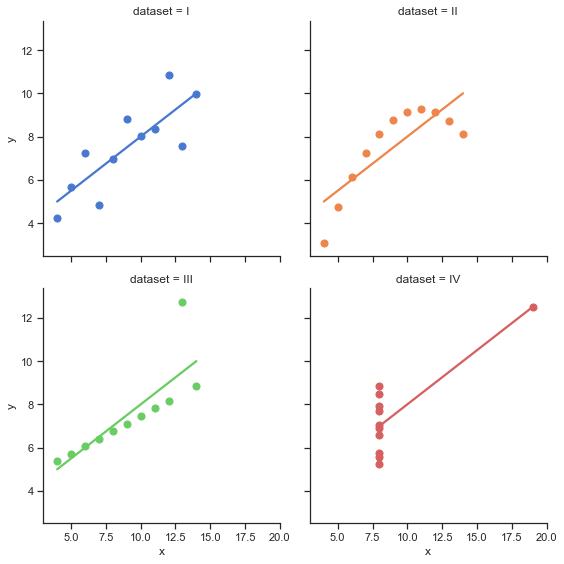

In [8]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

#inspite of the same descriptives the dataset look very different. just having
#descriptives is not enough, visualization becomes very important

## Matplotlib

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Matplotlib is a complex library (70,000 + lines of code!). In order to best understand how it creates graphs it's important to understand how objects are structured in matplotlib. 

### Two Ways to Generate a Single Plot

**Method 1**<br>
Plot your Xs vs your Ys

Text(0.5, 1.0, 'This is an example title')

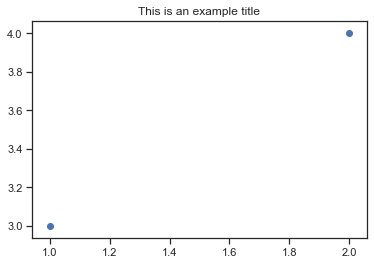

In [10]:
X = [1,2]
Y = [3,4]
## directly plotting x and y by calling scatter. .scatter is a short
#hand notation for very quick 
plt.scatter(X,Y);
plt.title('This is an example title')
#not the best way - not storing anywhere else as well as not much
#customization possible. check method 2
#methods in plt is limited

**Method 2**<br>
Using subplots to set up your figure and axes

<img src = 'figure-axes.png' width = 400;>

figure is the picture
axis is the 
if we can store both fig and axis as separate object, we can store them call them and carefully customize them

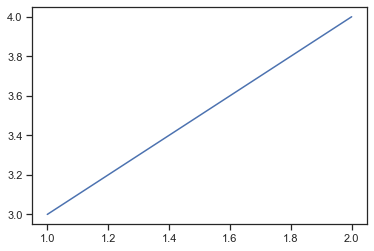

In [11]:
fig, ax = plt.subplots()
# .subplots to create to object - figure and axis
ax.plot(X, Y);

In [9]:
type(fig)

matplotlib.figure.Figure

In [10]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

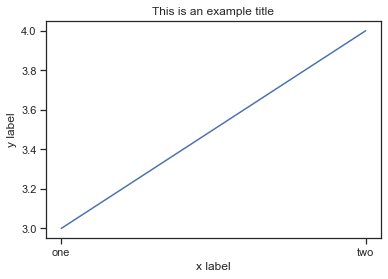

In [12]:
ax.set_title('This is an example title');
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_xticks([1,2])
ax.set_xticklabels(['one','two'])
fig
# examine the ax object

In [ ]:
# examine the figure


#### How do we add a title to the above plot? 

In [13]:
ax.set_title('Line')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis');
ax.set_xticks([1,2]);

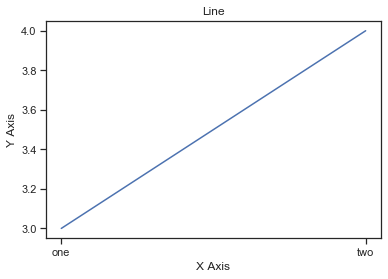

In [14]:
# examine the figure
fig

### Create a Figure with 2 Axes(Plots) 

In stages

In [13]:
#help(plt.subplots())

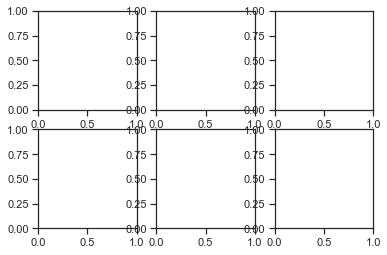

In [16]:
fig, ax = plt.subplots(1,2)

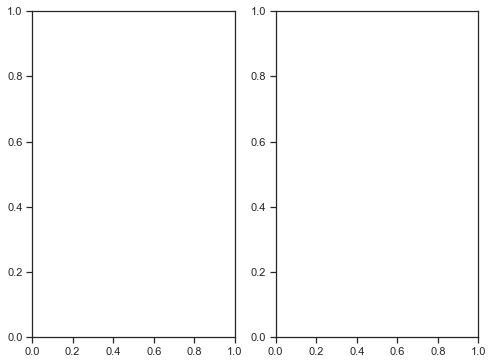

In [17]:
fig, ax = plt.subplots(1,2,figsize =(8,6))

In [18]:
ax[0].bar([1,2], [3,4],color = 'pink', alpha = 0.5) 
# if two dimensions, index within ax as [row,column]
ax[1].scatter([1,2], [3,4], color = 'blue', alpha = 0.5)

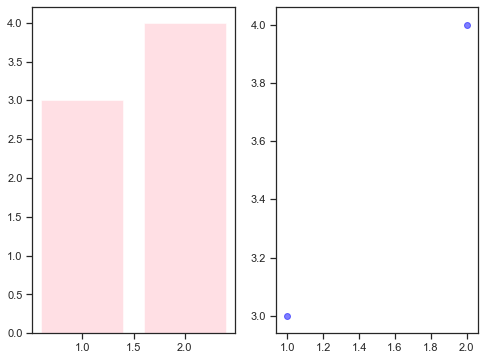

In [19]:
fig


In [20]:
# help function on barplot 
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the bars (default: 0.8).
    
    bottom : scalar or array-like, optional
        The y coordinate(s) of the bars bases (default: 0).
    
    align : {'cent

In [21]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequen

In [ ]:
# check out the figure

### Another example

In [23]:
#generate some data
x = np.linspace(0, 10, 100)
#equal spaced data points, start at 0 and end at 10, 100 data points
y = np.sin(x)

In [25]:
print(x[:20])
print(y[:20])

[0.         0.1010101  0.2020202  0.3030303  0.4040404  0.50505051
 0.60606061 0.70707071 0.80808081 0.90909091 1.01010101 1.11111111
 1.21212121 1.31313131 1.41414141 1.51515152 1.61616162 1.71717172
 1.81818182 1.91919192]
[0.         0.10083842 0.20064886 0.2984138  0.39313661 0.48385164
 0.56963411 0.64960951 0.72296256 0.78894546 0.84688556 0.8961922
 0.93636273 0.96698762 0.98775469 0.99845223 0.99897117 0.98930624
 0.96955595 0.93992165]


#### create a figure with 2 x 2 plots

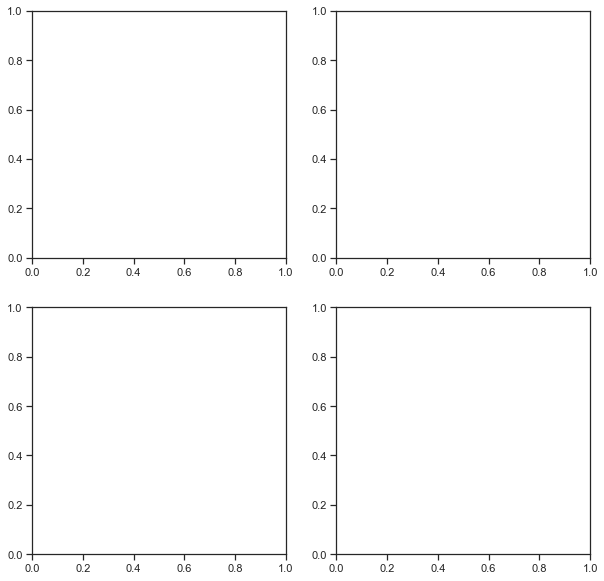

In [26]:
figure_sin, axes = plt.subplots(2,2, figsize = (10,10))
# 4 visualtions of a size 10 by 10

In [27]:
axes[0][0].scatter(x,y) # for first two row and first column
axes[0][1].plot(x,y)
axes[1][0].hist(y)
axes[1][1].fill(x,y);

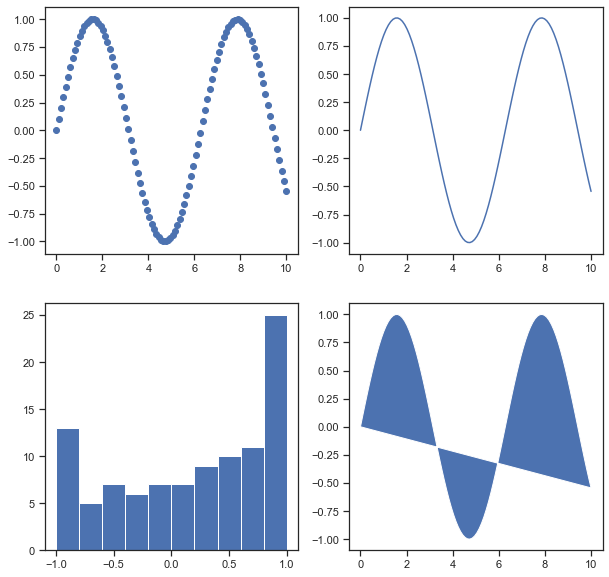

In [28]:
figure_sin

#### How can we create a title for the scatter plot? 

In [29]:
axes[0][0].set_title('Scatter')
axes[0][0].set_xlabel('Independent variable name')
axes[0][0].set_ylabel('Dependent variable name');
axes[0][1].set_title('line plot');

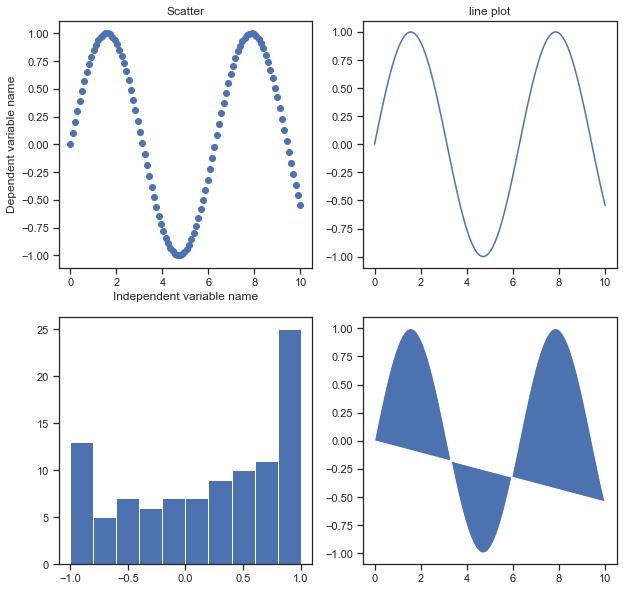

In [30]:
figure_sin

### Your turn

1 - Create a 2x2 figure with matplotlib<br>
2 - Use 4 different types of plots for the following dataset

In [2]:
aq = pd.read_csv('aq.csv')

In [3]:
aq

,x123,x4,y1,y2,y3,y4
0,10.0,8.0,8.04,9.14,7.46,6.58
1,8.0,8.0,6.95,8.14,6.77,5.76
2,13.0,8.0,7.58,8.74,12.74,7.71
3,9.0,8.0,8.81,8.77,7.11,8.84
4,11.0,8.0,8.33,9.26,7.81,8.47
5,14.0,8.0,9.96,8.10,8.84,7.04
6,6.0,8.0,7.24,6.13,6.08,5.25
7,4.0,19.0,4.26,3.10,5.39,12.50
8,12.0,8.0,10.84,9.13,8.15,5.56
9,7.0,8.0,4.82,7.26,6.42,7.91


In [4]:
aq1 = aq[['x123','y1']]
aq1

,x123,y1
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


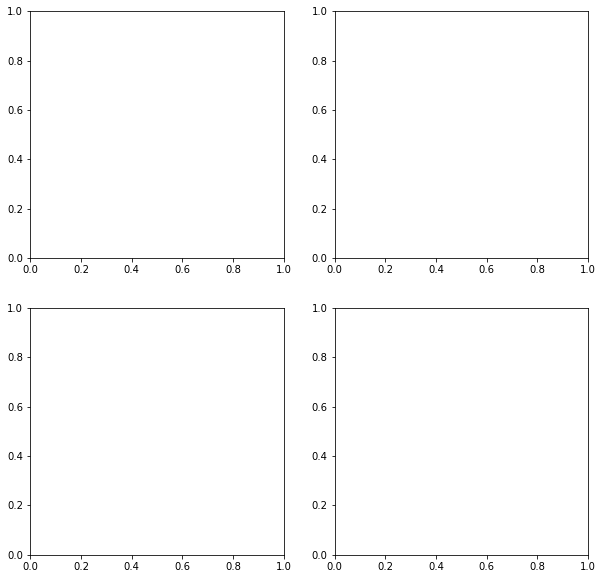

In [5]:
fig , axes = plt.subplots(2,2, figsize = (10,10))

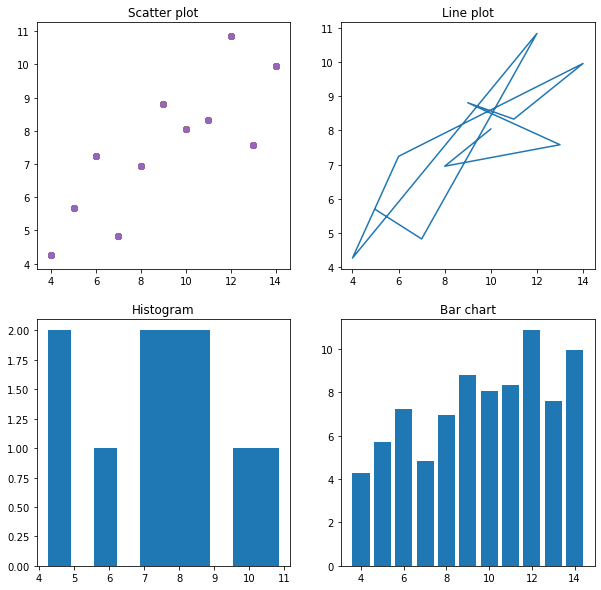

In [13]:
# Take the opportunity to read the documentation of these 4 methods
x = aq1['x123']
y = aq1['y1']
axes[0][0].scatter(x,y)
axes[0][1].plot(x,y)
axes[1][0].hist(y)
#histogram is bars to touch. hist is a range and continuous
axes[1][1].bar(x,y)
fig

(array([2., 0., 1., 0., 2., 2., 2., 0., 1., 1.]),
 array([ 4.26 ,  4.918,  5.576,  6.234,  6.892,  7.55 ,  8.208,  8.866,
         9.524, 10.182, 10.84 ]),
 <a list of 10 Patch objects>)

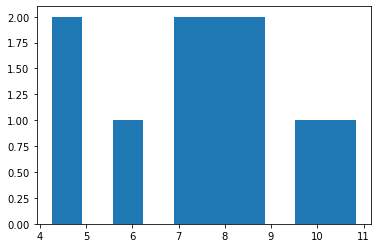

In [11]:
plt.hist(y)

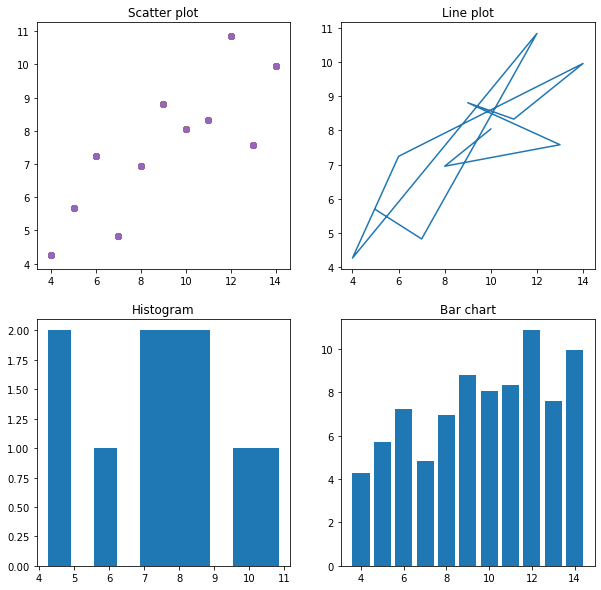

In [14]:
# Add titles to each of the axes objects
axes[0][0].set_title('Scatter plot')
axes[0][1].set_title('Line plot')
axes[1][0].set_title('Histogram')
axes[1][1].set_title('Bar chart')
fig

In [ ]:
# And finally label your axes
axes[0][0].set_xlabel('Independent variable name')
axes[][_]._('Independent variable name')
axes[_][_]._('Independent variable name')
axes[_][_]._('Independent variable name')

axes[_][_]._('Dependent variable name')
axes[_][_]._('Dependent variable name')
axes[_][_]._('Dependent variable name')
axes[_][_]._('Dependent variable name')

In [ ]:
# Now show the plot
fig

## Data Analysis Example & Using Seaborn

Seaborn is built on top of Matplotlib. Seaborn adds some styling to existing matplotlib graphs as well as adds some additional graphing capabilities. 

In [15]:
import seaborn as sns
sns.set()

In [16]:
plt.style.use('fivethirtyeight')
# here fivethirtyeight is just a style. 

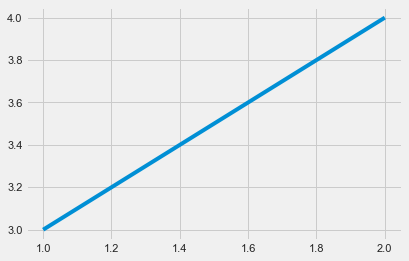

In [17]:
plt.plot([1,2], [3,4])

The most useful aspect of seaborn is that it allows you to use Pandas DataFrame Objects directly. 

In [18]:
#loads tips dataset
tips = sns.load_dataset("tips")

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


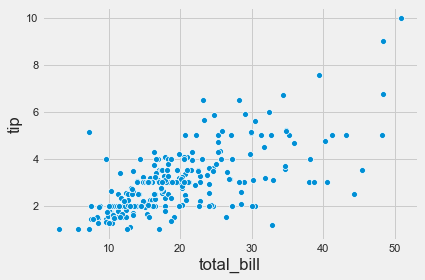

In [20]:
# visualize the relationship between bill and tip
sns.scatterplot('total_bill', 'tip', data=tips);

In [21]:
tips.sex

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
239      Male
240    Female
241      Male
242      Male
243    Female
Name: sex, Length: 244, dtype: category
Categories (2, object): [Male, Female]

In [24]:
# calculate average tips amount by gender
y = tips.groupby(['sex']).tip.mean()
x = y.index

In [25]:
print(y)
print(y.index)

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64
CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, name='sex', dtype='category')


In [ ]:
# check to see if x and y are correct

[Text(0, 0, 'male'), Text(0, 0, 'female')]

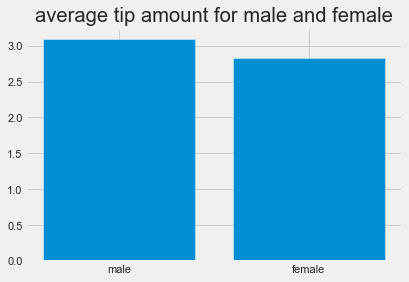

In [26]:
# visualize the average tips men vs women pay - what's the appropriate plot?
#x = None
#average_tips_amount = None
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_title('average tip amount for male and female')
ax.set_xticks([0,1])
ax.set_xticklabels(['male','female'])

In [28]:
# visualize the average amount of total bill for time (lunch or dinner)
y = tips.groupby(['time']).tip.mean()
x = y.index

In [29]:
print(x)
print(y)

CategoricalIndex(['Lunch', 'Dinner'], categories=['Lunch', 'Dinner'], ordered=False, name='time', dtype='category')
time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64


[Text(0, 0, 'lunch'), Text(0, 0, 'dinner')]

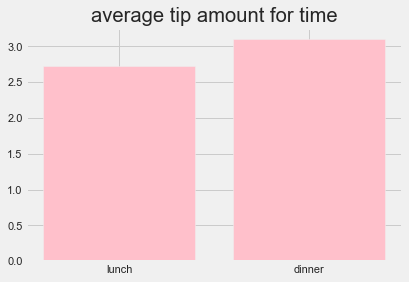

In [30]:
fig, ax = plt.subplots()
ax.bar(x,y, color = 'pink')
ax.set_title('average tip amount for time')
ax.set_xticks([0,1])
ax.set_xticklabels(['lunch','dinner'])

## Resources

- https://www.ted.com/talks/david_mccandless_the_beauty_of_data_visualization#t-503926
- https://realpython.com/python-matplotlib-guide/ 


- https://pudding.cool/
- http://setosa.io/#/